<a id = 'cont'></a>
# Content

1. [Importing Libraries and Reading Data](#sec1)
2. [Feature Engineering and Data Visualization](#sec2)
    - [Age Feature](#subsec1)
    - [Tenure Feature](#subsec2)
    - [Gender Feature](#subsec3)
    - [Geography Feature](#subsec4)
    - [Balance Feature](#subsec5)
    - [CreditSCore Feature](#subsec6)
    - [NumOfProducts Feature](#subsec7)
3. [Getting Data Ready to Train](#sec3)
4. [Predictions](#sec4)
    - [Logistic Regression](#subsec11)
    - [K Nearest Neighbors](#subsec12)
    - [Support Vector Classification](#subsec13)
    - [Decision Tree Classifier](#subsec14)
    - [Random Forest CLassifier](#subsec15)
    - [AdaBoost Classifier](#subsec16)
    - [Gradient Boosting Classifier](#subsec17)
    - [XGBoost Classifier](#subsec18)

<a id = 'sec1'></a>
# Importing Libraries and Reading Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/will-customer-leave-bank/ML_TASK_CSV.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('../input/will-customer-leave-bank/ML_TASK_CSV.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


[Back To Contents(Click Here)](#cont)

<a id = 'sec2'></a>
# Feature Engineering and Data Visualizations

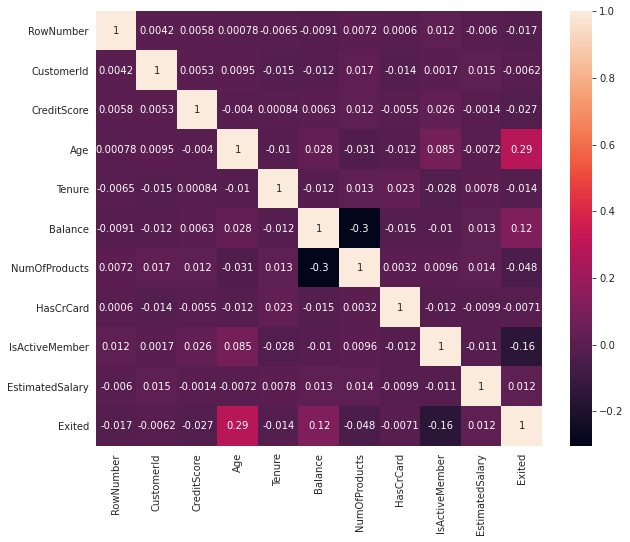

In [9]:
#Correlation Graph
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

<a id = 'subsec1'></a>
**Age Feature**

Text(0.5, 1.0, 'Male')

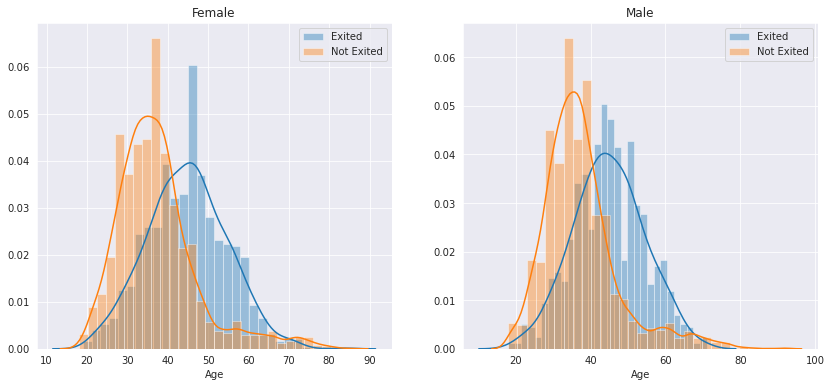

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
females = df[df['Gender'] == 'Female']
males = df[df['Gender'] == 'Male']

ax = sns.distplot(females[females['Exited'] == 1].Age, bins=30, label='Exited', ax=axes[0], hist_kws = {'edgecolor':'white'})
ax = sns.distplot(females[females['Exited'] == 0].Age, bins=30, label='Not Exited', ax=axes[0], hist_kws = {'edgecolor':'white'})
ax.legend()
ax.set_title('Female')
ax = sns.distplot(males[males['Exited'] == 1].Age, bins=30, label='Exited', ax=axes[1], hist_kws = {'edgecolor':'white'})
ax = sns.distplot(males[males['Exited'] == 0].Age, bins=30, label='Not Exited', ax=axes[1], hist_kws = {'edgecolor':'white'})
ax.legend()
ax.set_title('Male')

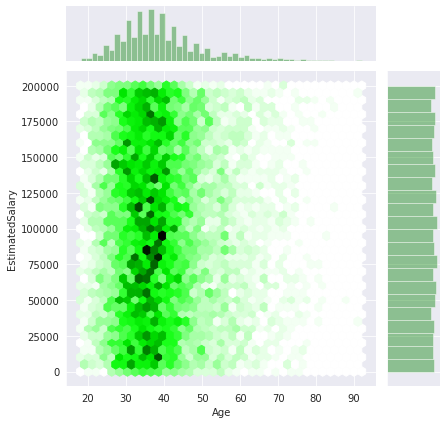

In [11]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', data = df, kind = 'hex', color = 'green')

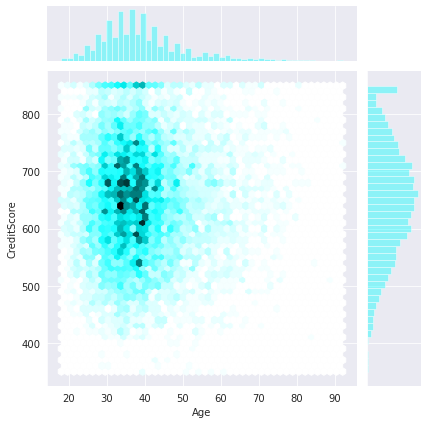

In [12]:
sns.jointplot(x = 'Age', y = 'CreditScore', data = df, kind = 'hex', color = 'cyan')

We can classifiy age feature form continuous to categorical feature.

In [13]:
age = []
for i in df['Age']:
    if i <= 33:
        age.append(1)
    elif i >33 and i <= 40:
        age.append(2)
    elif i > 40:
        age.append(3)
        
df['Age'] = age

In [14]:
df_1 = df[df['Age'] == 1]
df_2 = df[df['Age'] == 2]
df_3 = df[df['Age'] == 3]
df_1 = df_1['Exited'].value_counts()
df_2 = df_2['Exited'].value_counts()
df_3 = df_3['Exited'].value_counts()

trace1 = go.Bar(x = df_1.index[::-1], y = df_1.values[::-1], name = 'Age(18-33)', marker = dict(color = 'cadetblue'))
trace2 = go.Bar(x = df_2.index[::-1], y = df_2.values[::-1], name = 'Age(34-40)', marker = dict(color = 'teal'))
trace3 = go.Bar(x = df_3.index[::-1], y = df_3.values[::-1], name = 'Age(40-92)', marker = dict(color = 'seagreen'))
data = [trace1, trace2, trace3]
layout = go.Layout(height = 400, width = 700, title = 'Age Distribution')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

From above plot we can conclude that there's a signinficant difference in age categories exiting bank.

<a id = 'subsec2'></a>
**Tenure Feature**

In [15]:
df_1 = df[df['Exited'] == 1]
df_2 = df[df['Exited'] == 0]
df_1 = df_1['Tenure'].value_counts()
df_2 = df_2['Tenure'].value_counts()

trace1 = go.Bar(x = df_1.index[::-1], y = df_1.values[::-1], name = 'Exited', marker = dict(color = 'cadetblue'))
trace2 = go.Bar(x = df_2.index[::-1], y = df_2.values[::-1], name = 'Not Exited', marker = dict(color = 'teal'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 700, title = 'Tenure Distribution')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

<a id = 'subsec3'></a>
**Gender Feature**

In [16]:
df_1 = df[df['Gender'] == 'Male']
df_2 = df[df['Gender'] == 'Female']
df_1 = df_1['Exited'].value_counts()
df_2 = df_2['Exited'].value_counts()

trace1 = go.Bar(x = df_1.index[::-1], y = df_1.values[::-1], name = 'Male', marker = dict(color = 'lightseagreen'))
trace2 = go.Bar(x = df_2.index[::-1], y = df_2.values[::-1], name = 'Female', marker = dict(color = 'crimson'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 700, title = 'Gender Distribution')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [17]:
labels = {'Female':0, 'Male':1}
df.replace({'Gender':labels}, inplace = True)

[Back To Contents(Click Here)](#cont)

<a id = 'subsec4'></a>
**Geography Feature**

In [18]:
df_1 = df[df['Exited'] == 1]
df_2 = df[df['Exited'] == 0]
df_1 = df_1['Geography'].value_counts()
df_2 = df_2['Geography'].value_counts()

trace1 = go.Bar(x = df_1.index[::-1], y = df_1.values[::-1], name = 'Exited', marker = dict(color = 'indigo'))
trace2 = go.Bar(x = df_2.index[::-1], y = df_2.values[::-1], name = 'Not Exited', marker = dict(color = 'green'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 700, title = 'Geography Distribution')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

People in Spain are tending to remain bank customer.

In [19]:
labels = {'Spain':1, 'France':2, 'Germany':3}
df.replace({'Geography':labels}, inplace = True)

<a id = 'subsec5'></a>
**Balance Feature**

In [20]:
df_1 = df[df['Balance'] == 0.00]
df_2 = df[df['Balance'] != 0.00]
df_1 = df_1['Exited'].value_counts()
df_2 = df_2['Exited'].value_counts()

trace1 = go.Bar(x = df_1.index[::-1], y = df_1.values[::-1], name = 'Exited', marker = dict(color = 'peru'))
trace2 = go.Bar(x = df_2.index[::-1], y = df_2.values[::-1], name = 'Not Exited', marker = dict(color = 'darkred'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 700, title = 'Balance Distribution')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

From above distribution we verified that people with zero balance are more interested in leaving bank. So we'll convert continuous column into categorical with categories: 1 - Non-zero Balance, 0 - Zero Balance

In [21]:
balance = []
for i in df['Balance']:
    if i == 0.0:
        balance.append(0)
    else:
        balance.append(1)
        
df['Balance'] = balance

<a id = 'subsec6'></a>
**CreditScore Feature**

We'll try the same approach as we did with balance feature and verify by plotting distribution respectively.

In [22]:
credit = []
for i in df['CreditScore']:
    if i < 600:
        credit.append(1)
    elif i >= 600 and i < 700:
        credit.append(0)
    elif i >= 700:
        credit.append(1)
        
df['CreditScore'] = credit

In [23]:
df_1 = df[df['CreditScore'] == 1]
df_2 = df[df['CreditScore'] == 0]
df_1 = df_1['Exited'].value_counts()
df_2 = df_2['Exited'].value_counts()

trace1 = go.Bar(x = df_1.index[::-1], y = df_1.values[::-1], name = 'CScore(<=600 & >700)', marker = dict(color = 'chartreuse'))
trace2 = go.Bar(x = df_2.index[::-1], y = df_2.values[::-1], name = 'CScore(601-700)', marker = dict(color = 'coral'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 700, title = 'CreditScore Distribution')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

[Back To Contents(Click Here)](#cont)

<a id = 'subsec7'></a>
**NumOfProducts Feature**

In [24]:
df_1 = df[df['Exited'] == 1]
df_2 = df[df['Exited'] == 0]
df_1 = df_1['NumOfProducts'].value_counts()
df_2 = df_2['NumOfProducts'].value_counts()

trace1 = go.Bar(x = df_1.index[::-1], y = df_1.values[::-1], name = 'Exited', marker = dict(color = 'deeppink'))
trace2 = go.Bar(x = df_2.index[::-1], y = df_2.values[::-1], name = 'Not Exited', marker = dict(color = 'yellow'))
data = [trace1, trace2]
layout = go.Layout(height = 400, width = 700, title = 'NumOfProducts Distribution')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

<a id = 'sec3'></a>
# Getting Data Ready to Train

We'll drop the useless features.

In [25]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [26]:
#RobustScaler works best and effectively on continuous Estimated Salary data
scaler = RobustScaler()
df[['EstimatedSalary']] = scaler.fit_transform(df[['EstimatedSalary']])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2,0,3,2,0,1,1,1,0.011739,1
1,0,1,0,3,1,1,1,0,1,0.125512,0
2,1,2,0,3,8,1,3,1,0,0.139630,1
3,0,2,0,2,1,0,2,0,0,-0.064717,0
4,1,1,0,3,2,1,1,1,1,-0.214561,0


In [27]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

[Back To Contents(Click Here)](#cont)

<a id = 'sec3'></a>
# Predictions

<a id = 'subsec11'></a>
**Logistic Regression**

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
lr_train_acc = round(lr.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', lr_train_acc)
lr_test_acc = round(lr.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', lr_test_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      2788
           1       0.23      0.65      0.34       212

    accuracy                           0.82      3000
   macro avg       0.60      0.74      0.62      3000
weighted avg       0.92      0.82      0.86      3000

Training Accuracy:  81.31
Testing Accuracy:  81.9
Confusion Matrix: 
 [[2320   75]
 [ 468  137]]


<a id = 'subsec12'></a>
**K Nearest Neighbors**

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
knn_train_acc = round(knn.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', knn_train_acc)
knn_test_acc = round(knn.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', knn_test_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      2624
           1       0.39      0.63      0.48       376

    accuracy                           0.83      3000
   macro avg       0.67      0.74      0.69      3000
weighted avg       0.87      0.83      0.85      3000

Training Accuracy:  86.27
Testing Accuracy:  83.03
Confusion Matrix: 
 [[2255  140]
 [ 369  236]]


<a id = 'subsec13'></a>
**Support Vector Classification**

In [31]:
svc = SVC(C = 1, gamma = 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
svc_train_acc = round(svc.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', svc_train_acc)
svc_test_acc = round(svc.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', svc_test_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      2672
           1       0.36      0.67      0.47       328

    accuracy                           0.84      3000
   macro avg       0.66      0.76      0.69      3000
weighted avg       0.89      0.84      0.86      3000

Training Accuracy:  90.34
Testing Accuracy:  83.57
Confusion Matrix: 
 [[2287  108]
 [ 385  220]]


[Back To Contents(Click Here)](#cont)

<a id = 'subsec14'></a>
**Decison Tree Classifier**

In [32]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
dt_train_acc = round(dt.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', dt_train_acc)
dt_test_acc = round(dt.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', dt_test_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      2589
           1       0.48      0.71      0.57       411

    accuracy                           0.86      3000
   macro avg       0.72      0.79      0.74      3000
weighted avg       0.89      0.86      0.87      3000

Training Accuracy:  84.54
Testing Accuracy:  85.6
Confusion Matrix: 
 [[2276  119]
 [ 313  292]]


<a id = 'subsec15'></a>
**Random Forest Classifier**

In [33]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 10, n_jobs = -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
rf_train_acc = round(rf.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', rf_train_acc)
rf_test_acc = round(rf.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', rf_test_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.91      2619
           1       0.46      0.73      0.57       381

    accuracy                           0.86      3000
   macro avg       0.71      0.80      0.74      3000
weighted avg       0.89      0.86      0.87      3000

Training Accuracy:  88.83
Testing Accuracy:  85.73
Confusion Matrix: 
 [[2293  102]
 [ 326  279]]


<a id = 'subsec16'></a>
**AdaBoost Classifier**

In [34]:
adb = AdaBoostClassifier(n_estimators = 300)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
adb_train_acc = round(adb.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', adb_train_acc)
adb_test_acc = round(adb.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', adb_test_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      2643
           1       0.43      0.73      0.54       357

    accuracy                           0.85      3000
   macro avg       0.69      0.80      0.73      3000
weighted avg       0.90      0.85      0.87      3000

Training Accuracy:  84.66
Testing Accuracy:  85.2
Confusion Matrix: 
 [[2297   98]
 [ 346  259]]


<a id = 'subsec17'></a>
**Gradient Boosting Classifier**

In [35]:
gdb = GradientBoostingClassifier(n_estimators = 200, subsample = 0.8)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
gdb_train_acc = round(gdb.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', gdb_train_acc)
gdb_test_acc = round(gdb.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', gdb_test_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      2583
           1       0.49      0.71      0.58       417

    accuracy                           0.86      3000
   macro avg       0.72      0.80      0.75      3000
weighted avg       0.89      0.86      0.87      3000

Training Accuracy:  86.37
Testing Accuracy:  85.8
Confusion Matrix: 
 [[2276  119]
 [ 307  298]]


[Back To Contents(Click Here)](#cont)

<a id = 'subsec18'></a>
**XGBoost Classifier**

In [36]:
xgbc = XGBClassifier(max_depth = 3)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

print('Classification Report: \n', classification_report(y_pred, y_test))
xgbc_train_acc = round(xgbc.score(X_train, y_train) * 100, 2)
print('Training Accuracy: ', xgbc_train_acc)
xgbc_test_acc = round(xgbc.score(X_test, y_test) * 100, 2)
print('Testing Accuracy: ', xgbc_test_acc)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      2586
           1       0.49      0.72      0.58       414

    accuracy                           0.86      3000
   macro avg       0.72      0.80      0.75      3000
weighted avg       0.89      0.86      0.87      3000

Training Accuracy:  86.53
Testing Accuracy:  85.9
Confusion Matrix: 
 [[2279  116]
 [ 307  298]]


# Plotting Accuracy

In [37]:
x = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree','Random Forest','AdaBoost','Gradient Boosting','XGBoost']
y1 = [lr_train_acc, knn_train_acc, svc_train_acc, dt_train_acc, rf_train_acc, adb_train_acc, gdb_train_acc, xgbc_train_acc]
y2 = [lr_test_acc, knn_test_acc, svc_test_acc, dt_test_acc, rf_test_acc, adb_test_acc, gdb_test_acc, xgbc_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'forestgreen'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'lawngreen'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

# Please Upvote, any suggestions are welcome.

[Back To Contents(Click Here)](#cont)